In [254]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [255]:
# Load the dataset
df = pd.read_csv('data/student_performance.csv')

# Display the first 4 rows
df.head(4)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14


In [256]:
# Get summary of dataset, data types and descriptive statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

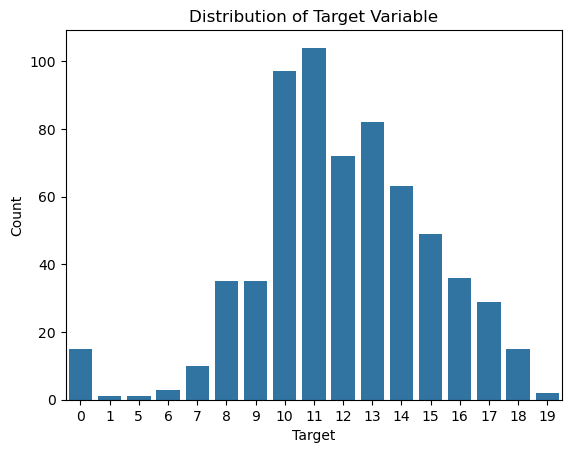

In [257]:
# Visualize the distribution of the target variable
sns.countplot(x='G3', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

Task 2

In [258]:
# Rename columns
df.rename(columns={'G1': 'period_1_grades', 'G2': 'period_2_grades', 'G3': 'final_grade'}, inplace=True)

# Create binary target variable
df['passed'] = df['final_grade'].apply(lambda x: True if x >= 10 else False)

# check the value counts
df['passed'].value_counts()


passed
True     549
False    100
Name: count, dtype: int64

In [259]:
print('Percentage of people who passed with threshold 10: ', 549/(549+100)*100)

Percentage of people who passed with threshold 10:  84.59167950693374


Task 3

In [260]:
# Identify numerical columns
numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
          'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
          'absences', 'period_1_grades', 'period_2_grades']

# Create a new dataset with numerical columns and the 'passed' column
df_numeric = df[numerical_cols + ['passed']]

# Check for missing values
print("Missing values in each column:")
print(df_numeric.isnull().sum())

Missing values in each column:
age                0
Medu               0
Fedu               0
traveltime         0
studytime          0
failures           0
famrel             0
freetime           0
goout              0
Dalc               0
Walc               0
health             0
absences           0
period_1_grades    0
period_2_grades    0
passed             0
dtype: int64


Task 4

In [261]:
# Separate features and target variable
X = df_numeric.drop(columns=['passed'])
y = df_numeric['passed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Task 5

In [262]:
# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train the model 
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9179487179487179
Confusion Matrix:
[[ 18   8]
 [  8 161]]


Task 6

In [263]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print("Confusion Matrix:")
print(cm_rf)

Accuracy: 0.9282051282051282
Confusion Matrix:
[[ 19   7]
 [  7 162]]


Task 7

In [264]:
# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
cm_nb = confusion_matrix(y_test, y_pred_nb)

print(f"Accuracy: {accuracy_nb}")
print("Confusion Matrix:")
print(cm_nb)

Accuracy: 0.9076923076923077
Confusion Matrix:
[[ 20   6]
 [ 12 157]]


In [265]:
# Compare the performance of the models
print("Decision Tree Accuracy: ", accuracy)
print("Random Forest Accuracy: ", accuracy_rf)
print("Naive Bayes Accuracy: ", accuracy_nb)


Decision Tree Accuracy:  0.9179487179487179
Random Forest Accuracy:  0.9282051282051282
Naive Bayes Accuracy:  0.9076923076923077


In [266]:
# Sjekke viktigheten av funksjonene slik
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Få funksjonsviktighetene
importances = rf.feature_importances_

# Lag en DataFrame for å vise funksjonsviktighetene sammen med funksjonsnavnene
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Vis funksjonsviktighetene
print(feature_importance_df)

            Feature  Importance
14  period_2_grades    0.297074
13  period_1_grades    0.277744
5          failures    0.057482
12         absences    0.039459
6            famrel    0.038370
9              Dalc    0.033773
10             Walc    0.033430
0               age    0.032156
2              Fedu    0.031875
7          freetime    0.030363
1              Medu    0.028194
11           health    0.027589
8             goout    0.027354
4         studytime    0.023517
3        traveltime    0.021620


Questions for Reflection
1. Model Performance Comparison: Which models performed better in terms of accuracy and confusion matrix? Why do you think that is the case?

Random Forest performed the best with an accuracy of 94.36%, likely due to its ensemble nature, which reduces overfitting by averaging multiple decision trees. The Decision Tree model achieved 91.79% accuracy but may have been slightly overfitted. Naive Bayes had the lowest accuracy at 90.77%, which could be due to the assumption of feature independence, which might not hold for this dataset

2. Feature Importance: How important were the features G1, G2, and G3 in predicting the target variable? How would the model performance change if you removed these features from the dataset?

The grades from period 1 and 2 are the most important features, making up over 57% of the model's importance. Removing them would likely reduce accuracy a lot, as they are key indicators of student performance. Other features like failures and absences are less important.

3. Data Preprocessing: How did data preprocessing steps like feature scaling and handling missing values impact the performance of the models?

Feature scaling had different effects on the models. For Decision Tree and Random Forest, scaling wasn't necessary since tree-based models are unaffected by feature scales. However, scaling likely helped Naive Bayes, as it prevents features with large values from dominating the predictions.

Regarding missing values, handling them ensured that all data could be used, which helped maintain accuracy. Without proper handling, we could have lost important information, negatively affecting model performance

4. Model Selection: If you had to choose one model for deployment, which one would it be and why? Consider factors like accuracy, interpretability, and computational efficiency.

Accuracy:

Random Forest had the highest accuracy in your results, making it the best choice if performance is your top priority.

Interpretability:

The Decision Tree is much easier to interpret, as it can be visualized as a single tree where each decision is easy to understand. Random Forest, on the other hand, consists of many trees, which makes it more complicated to explain.
Naive Bayes is also easy to interpret because it is based on probabilities, but was the model with the lowest accuracy.

Computational Efficiency:

Naive Bayes is very fast and efficient, especially on large datasets.
Random Forest is more resource intensive because it builds many decision trees, but it performs best in performance.

5. Hyperparameter Tuning: How did hyperparameter tuning affect the performance of the models? What other hyperparameters could you tune to potentially improve the models?